# Ring Opening/Closing

A classic example of organic chemistry is a pericyclic reaction. Let us use the example of the electrocyclic reaction that interconverts butadiene and cyclobutene.

## Intrinsic Reaction Coordinate

The best way to follow this reaction is to start with the cyclobutene and stretch the breaking bond to estimate the structure of the transition state. Then we perform a ytransition state optimization to get the structure of the TS.

Now we can follow the path of the reaction downhill from the TS in both directions. This will allow more than just the single coordinate that was being driven in the PES scan to be followed as we return to product and will be a better representation of the overall reaction coordinate.

## Start with the Build

Cyclic structures do not work well with Z-matrices for describibg geometry. Forcing a frozen bond length change will necesitate changes in bends and torsions in adjacent atoms which may require bond length changes to accommodate these values which will require changes in bends and torsions in adjacent atoms, ad infinitum. Sometimes a Z-matrix works, but often it results in intractable computational problems.

It is better to use cartesian coordinates in these systems. But, how do we get a set of xyz coordnates for a molecule? We could look uop a set from databases on the web and cyclobutadiene is a small molecule and very likely to be represented in databases. I will start with a Z-matrix for butadiene and alter it to make the bond angles and lengths resemble cyclobutene and then allow the system to optimize without constraints

I used the Z-matrix from previous butadiene builds. Consider the code below and observe that I made the dihedral angle zero degrees. This is the s-cis conformer. I then changed the bend angle of the terminal carbon atons (A_321) to 90 degrees to make it square and bring the ends together. I changed the torsion angle of a terminal hydrogen (D2) to 90 degrees to get it out to the side of the structure.

In [1]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "10-cyclization-start-cyclobutene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c1
       dihedral  =  2
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 90
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 90
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(mol)



  Memory set to   1.863 GiB by Python driver.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Optimize the Initial Structure

The structure was visualized with the ```helpers.drawXYZ()``` function and it looked awful. But it should be close enough to optimize to the cyclobutadiene. Or it will explode (computationally) and either snap back to butadiene or really go wild and end in errors and tears. Let us see by running the code below.

Observe that I optimized with a minimal basis set to correct the structure quickly before optimizing with a larger basis setin hopes of greater accuracy. 

In [2]:
# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

energy_1, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)      # quick
energy_2, hist2 = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)  # more accurate
                                                                       
print(f"Initial energy is {energy_2:0.7f} Hartrees")

internal_angle = mol.get_variable("A_321")

print(f"After optimization: {internal_angle:.3f} degrees\n") 

hp.drawXYZ_labeled(mol)

psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_in_input_format()
!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Initial energy is -154.9030286 Hartrees
After optimization: 94.490 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Molecular point group: c2
    Full point group: C2

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    C       
    C             1         CC1
    C             2         CC2      1       A_321
    C             3         CC1      2       A_321      1    dihedral
    H             1      CH_5_9      2      CH_512      3          D3
    H             1     CH_6_10      5      CH_615      2          D2
    H             2      CH_7_8      1      CH_721      3          D1
    H             3      CH_7_8      4      CH_721      2          D1
    H             4      CH_5_9      3      CH_512      2          D3
    H             4     CH_6_10      9      CH_615      3          D2

    A_321     =   94.4896399298
    CC1       =    1.5157765388
    CC2       =    1.3254150061
    CH_512    =  115.7573511789
    CH_5_9    =    1.0856079832
    CH_615    =  108.7328616579
    CH_6_10   =    1.0855889919
    CH_721    =  132.0981498789
    CH_7_8    =    1.0755235317
    D1    

### Evaluate Optimized Structure

The visualized structure looks like butadiene. I printed out a file with the new Z-matrix and now see if I had set D2 to 120 degrees and D3 to -120 degrees I would have had a much better starting structure. But it worked so we now have a starting structure. We can evaluate att distances and bond angles by printing out a file and reading it back in like above. Does the information seem reasonable to you. Check the C-C distances. Do they fit with your expectations?

In [3]:
psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_distances()
mol.print_bond_angles()
mol.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

        Interatomic Distances (Angstroms)

        Distance 1 to 2 1.516   
        Distance 1 to 3 2.090   
        Distance 1 to 4 1.563   
        Distance 1 to 5 1.086   
        Distance 1 to 6 1.086   
        Distance 1 to 7 2.375   
        Distance 1 to 8 3.166   
        Distance 1 to 9 2.247   
        Distance 1 to 10 2.247   
        Distance 2 to 3 1.325   
        Distance 2 to 4 2.090   
        Distance 2 to 5 2.215   
        Distance 2 to 6 2.215   
        Distance 2 to 7 1.076   
        Distance 2 to 8 2.207   
        Distance 2 to 9 2.861   
        Distance 2 to 10 2.862   
        Distance 3 to 4 1.516   
        Distance 3 to 5 2.861   
        Distance 3 to 6 2.862   
        Distance 3 to 7 2.207   
        Distance 3 to 8 1.076   
        Distance 3 to 9 2.215   
        Distance 3 to 10 2.215   
        Distance 4 to 5 2.247   
        Distance 4 to 6 2.247   
        Distance 4 to 7 3.166   
        Distance 4 to 8 2.375   
        Distance 4 to 9 1.086 

### Archiving the Starting Point

We can collect the text string that defines the cartesian coordinates and print it out. You can cut and paste the text into your next project that starts with cyclobutene and save yourself the steps above. Consider the text below.

In [4]:
xyz = mol.save_string_xyz()

### print thegeometry string in xyz coordinates
print(xyz)

### write that string to a file for future use
f = open("10_cyclobutene_xyz.txt", "w")
f.write(xyz)
f.close()

mol.get_full_point_group()

0 1
 C    0.781360723864   -0.001488639702   -0.723916490611
 C    0.662707503027    0.000000000000    0.787208161007
 C   -0.662707503027    0.000000000000    0.787208161007
 C   -0.781360723864    0.001488639702   -0.723916490611
 H    1.236844253852   -0.884934834606   -1.160496686974
 H    1.240051906278    0.879722999724   -1.161605769633
 H    1.401852172080   -0.000237235517    1.568499380208
 H   -1.401852172080    0.000237235517    1.568499380208
 H   -1.236844253852    0.884934834606   -1.160496686974
 H   -1.240051906278   -0.879722999724   -1.161605769633



'C2'

## Hunt the Transition State

To find the transition state we will try a PES scan where we constrain the C1-C4 distance from the bond distance to longer distances. Since we are now daling with cartesian coordinates and not a z-matrix with variables we will have to use the ```RANGED_DISTANCE``` global setting to establish a C1-C4 bond distance that is to be reached through optimization. Recall that we had set a torsion angle in the Z-matrix and then used ```FROZEN_DIHEDRAL``` to freeze that set value. Here we start with the initial bond distance and use ```RANGED_DISTANCE``` to set a new value that must be moved toward. Best to keep the steps small when using this method else we can end up with weird problems like atoms passing through each other during optimization. 

I also set the convergence criteria (goal conditions for the optimization) to be "looser." This will prevent failure when the optimizations take too many steps because the criteria is tight. Lowering our standards for reaching a good structure is useful when we have tortured strained molecules along the PES scan. Consider the code below.

In [5]:
output_file = "Butane_PES_1.out"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
        "G_CONVERGENCE": "NWCHEM_LOOSE"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
         })

mol3 = mol.clone()

step = 0.05; start = 1.5; end = 3.2
number_of_points = (end - start)/step + 1
range_of_values = np.linspace(start, end, int(number_of_points)) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


distance_list = []
energy_list = []
geometries = []
histories = []
for distance in range_of_values:
    psi4.set_options({"RANGED_DISTANCE":f"1 4 {distance-.01} {distance+.01}"})
#    energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol3, return_history=True)
    distance_list.append(distance)
    energy_list.append(energy)
    geometries.append(mol3.clone())
    histories.append(hist)

print("Done")

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/si

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


### Collect and Save Data

It took twenty minutes to grind through the 35 different optimization calculations as we changed the enforced C1-C4 distance via the ```RANGED_DISTANCE``` option. We will take the lists of optimized energies and the list of corresponding C1-C4 bond distances and create a *Pandas* dataframe. I will add a new column that provides relative energies (w.r.t. the lowest energy) in units of kJ/mole.

I can then use the ```DataFrame.to_csv()``` method that is built into dataframe objects to save the data as a csv file. Now we can use the data set in future without recalculating. 

In [6]:
data_dictionary = {"distance": distance_list,
                   "energy": energy_list}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol
print(df)
df.to_csv("10_PES.csv")
#df.plot(x="distance", y = "kJ/mole", kind="scatter", )   # try kind="scatter" as well

    distance      energy     kJ/mole
0       1.50 -155.920602   25.451855
1       1.55 -155.921771   22.384669
2       1.60 -155.921843   22.193675
3       1.65 -155.920051   26.900634
4       1.70 -155.916853   35.294920
5       1.75 -155.912591   46.485234
6       1.80 -155.907562   59.689272
7       1.85 -155.901989   74.321881
8       1.90 -155.896033   89.958275
9       1.95 -155.889866  106.149896
10      2.00 -155.883582  122.647682
11      2.05 -155.877283  139.186455
12      2.10 -155.871006  155.666692
13      2.15 -155.864810  171.935145
14      2.20 -155.858740  187.870127
15      2.25 -155.852781  203.516765
16      2.30 -155.881808  127.306175
17      2.35 -155.888091  110.810549
18      2.40 -155.894095   95.045648
19      2.45 -155.899711   80.301228
20      2.50 -155.904861   66.779538
21      2.55 -155.909511   54.573272
22      2.60 -155.913649   43.708132
23      2.65 -155.917264   34.216362
24      2.70 -155.920387   26.016592
25      2.75 -155.923022   19.099645
2

### Visualize the Data

We see form the plot below that the PES has an odd shape. It looks like we overshot the energy of the TS and then a longer bond length finally demands that we snap back onto a structure that represented the path to product. Likely we are trapped in symmetry as we push the C1 and C4 groups apart. The cyclobutene starts in $C_{2v}$ symmetry, which the *Psi4* program will detect and use. I suspect this prevents the very small twist that must occur as we begin to approach the TS. A few steps after where the TS should have been, we are in enough strain that the gradient driver in the software pushes out of the $C_{2v}$ symmetry and we follow a $C_{2}$ structure downhill to product. 

This problem is a result of the way the software was built and how I set up the problem. There is likely a way to tell the softwre to be more flexible with symmetry. Perhaps I should run this calculation all over again but use the ```symmetry c1``` command in the geometry string for the molecule.

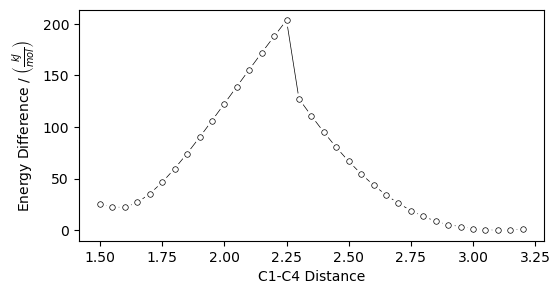

In [29]:
x = df["distance"]
y = df["kJ/mole"]

fig, ax =  plt.subplots(figsize=(6, 3))                     # Create a blank plot in a figure
ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)
ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "white", edgecolor = "black", linewidth = 0.5, s = 16, zorder = 2)
ax.set_xlabel('C1-C4 Distance')
ax.set_ylabel(r'Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()

### Track Structure vs Energy

We can obtain a slider widget-based visualization of the energy against the set bond lengths. We see the C1-C4 distance increasing as energy increases then there is a sudden structiure cahnge from the $C_{2v}$ form to the con-rotatory $C_2$ structure on the way to product. Considee the code below.

In [57]:
energies = df["energy"]
energies = energies - np.min(energies)
energies = energies * psi4.constants.hartree2kJmol
import helpers as hp

traj = [geom.save_string_xyz_file() for geom in geometries]
traj_arrays = [geom.to_arrays()[0] for geom in geometries]

#hp.drawXYZGeomSlider(traj)
distance_list1 = np.array(distance_list)*100              # Convert to picometers
distance_list1 = np.round(distance_list1).astype(int)     # Round and convert to integers
#print(distance_list2)                                    # The list of properties (x-axis) must be integers

hp.drawXYZGeomSliderMolecularProperty(traj, distance_list1, energies, 'distance (picometers)')



interactive(children=(IntSlider(value=150, description='quantity', max=320, min=150, step=5), Output()), _dom_…

### Accepting Failure

Your calculation may have turned out differently but mine did not approach a structure expected of the transition state. The C1 and C4 atoms were pushed apart to 1.9 angstroms but there was no rotation of the end groups or apparent progression to $sp^2$ from $sp^3$. I believe that the math is trapped in the higher $C_{2v}$ symmetry of the initial cyclobutadiene structure. We need to give it a push to tilt it off the crest of an energy ridge where the gradient toward rotating the end groups is zero. Either side of that ridge and it would follow a path downhill to the expected structure. However the very top of that ridge is $C_{2v}$ and it just wont vibrate off that line.

The code below captures information and prints it for our review. We see that the C1-C4 distance is indeed what was set in the code above. 

## Start Again with *s-cis* Butadiene

We will try again. this time we will start with the product of ring opening and move the terminal carbon groups closer together. First we will take the Z-matrix for *s-cis* Butadiene from previous work and oprtimize to the gauche stable conformer with a torsion angle of about 30 degrees.

In [9]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c2
       dihedral  =  30
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 120
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 180
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Optimize *s-cis* Butadiene

Consider the code below. This will produce an optimized structure for butadiene.

In [10]:
# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})
psi4.core.clean_options()

#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

print(f"321 angle: {mol.get_variable('A_321'):.3f} degrees\n") 
print(f"torsion: {mol.get_variable('dihedral'):.3f} degrees\n") 

hp.drawXYZ_labeled(mol)

psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_in_input_format()
mol.print_distances()
mol.print_bond_angles()
mol.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Initial energy is -154.9211311 Hartrees
321 angle: 125.415 degrees

torsion: 39.770 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Molecular point group: c2
    Full point group: C2

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    C       
    C             1         CC1
    C             2         CC2      1       A_321
    C             3         CC1      2       A_321      1    dihedral
    H             1      CH_5_9      2      CH_512      3          D3
    H             1     CH_6_10      5      CH_615      2          D2
    H             2      CH_7_8      1      CH_721      3          D1
    H             3      CH_7_8      4      CH_721      2          D1
    H             4      CH_5_9      3      CH_512      2          D3
    H             4     CH_6_10      9      CH_615      3          D2

    A_321     =  125.4146134307
    CC1       =    1.3248995874
    CC2       =    1.4779502675
    CH_512    =  121.2047246212
    CH_5_9    =    1.0752249315
    CH_615    =  116.8737654089
    CH_6_10   =    1.0758831646
    CH_721    =  118.8826941107
    CH_7_8    =    1.0786133439
    D1    

### Analyze the Starting Structure

We have inded obtained the *gauche* form of *s-cis* butadiene. This has the $C_2$ symmetry that we expect in the TS. We will start with the long distance between C1 and C4 and then move those two groups closer together until we reach the bond distance in cyclobutadiene. The code below will do this.

In [12]:
output_file = "10_Butadiene_PES_3.log"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
        "G_CONVERGENCE": "NWCHEM_LOOSE"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
         })

mol3 = mol.clone()

step = 0.05; start = 1.5; end = 3.2
number_of_points = (end - start)/step + 1
range_of_values = np.linspace(end, start, int(number_of_points)) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


distance_list2 = []
energy_list2 = []
geometries2 = []
histories2 = []
for distance in range_of_values:
    psi4.set_options({"RANGED_DISTANCE":f"1 4 {distance-.01} {distance+.01}"})
    energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol3, return_history=True)
    distance_list2.append(distance)
    energy_list2.append(energy)
    geometries2.append(mol3.clone())
    histories2.append(hist)

print("Done")

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/si

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/si

Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/si

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


### Collect and Save Data

Again we create a dataframe and use it to write out the data as a csv file.

In [62]:
data_dictionary2 = {"distance": distance_list2,
                   "energy": energy_list2}

df2 = pd.DataFrame.from_dict(data_dictionary2)

df2["kJ/mole"] = df2["energy"] - np.min(df2["energy"])
df2["kJ/mole"] = df2["kJ/mole"] * psi4.constants.hartree2kJmol
print(df2)
df2.to_csv("10_PES2.csv")
#df.plot(x="distance", y = "kJ/mole", kind="scatter", )   # try kind="scatter" as well

    distance      energy     kJ/mole
0       3.20 -155.929828    1.140396
1       3.15 -155.930186    0.199126
2       3.10 -155.930262    0.000000
3       3.05 -155.930234    0.074090
4       3.00 -155.929915    0.911397
5       2.95 -155.929277    2.585937
6       2.90 -155.928301    5.147956
7       2.85 -155.926954    8.684909
8       2.80 -155.925205   13.276099
9       2.75 -155.923024   19.004469
10      2.70 -155.920340   26.049634
11      2.65 -155.917267   34.119547
12      2.60 -155.913633   43.658732
13      2.55 -155.909477   54.570934
14      2.50 -155.904860   66.694095
15      2.45 -155.899685   80.280515
16      2.40 -155.894089   94.971749
17      2.35 -155.888055  110.813933
18      2.30 -155.881778  127.294907
19      2.25 -155.875477  143.837523
20      2.20 -155.869492  159.553006
21      2.15 -155.864719  172.082924
22      2.10 -155.871006  155.576433
23      2.05 -155.874765  145.706145
24      2.00 -155.881070  129.152905
25      1.95 -155.889879  106.026567
2

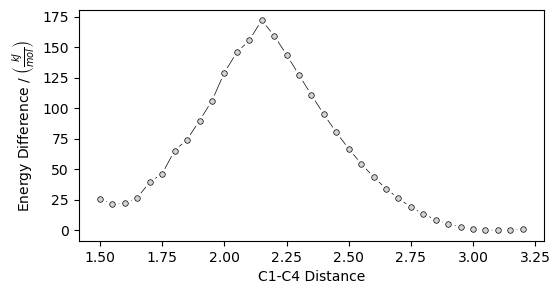

In [63]:
fig, ax =  plt.subplots(figsize=(6, 3))                     # Create a blank plot in a figure

x = df2["distance"]
y = df2["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "lightgray", edgecolor = "black", linewidth = 0.5, s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)

#ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", edgecolor = "black", s = 16, zorder = 2)

# ax.text(66.51-10, 20.5,"$66.5^\circ$")

ax.set_xlabel('C1-C4 Distance')
ax.set_ylabel(r'Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()

#print(df)

### Track the Structure vs Energy

Again, we use the widget to visualize structures with corresponding energy.

In [66]:
energies2 = df2["kJ/mole"]

traj2 = [geom.save_string_xyz_file() for geom in geometries2]
traj_arrays2 = [geom.to_arrays()[0] for geom in geometries2]

#hp.drawXYZGeomSlider(traj)
distance_list3 = np.array(df2["distance"])*100              # Convert to picometers
distance_list3 = np.round(distance_list3).astype(int)     # Round and convert to integers
#print(distance_list2)                                    # The list of properties (x-axis) must be integers

hp.drawXYZGeomSliderMolecularProperty(traj2, distance_list3, energies2, 'distance (picometers)')

interactive(children=(IntSlider(value=150, description='quantity', max=320, min=150, step=5), Output()), _dom_…

## Comparison of the Two Paths to TS

We took two paths to the TS. One started with the $C_{2v}$ cyclobutadiene and stretched the C1-C4 distance until the bond was broken and we has a structure that resembles $C_2$ *s-cis* butadiene. The other path was identical but took its steps in the reverse direction. I have plotted both PE scans below.

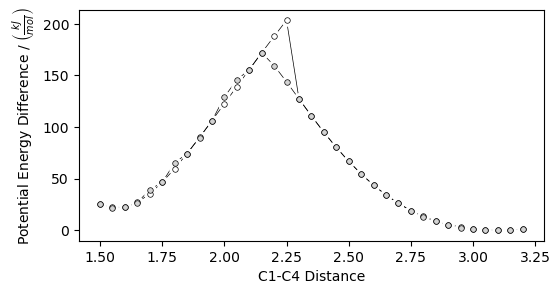

In [27]:
fig, ax =  plt.subplots(figsize=(6, 3))                     # Create a blank plot in a figure

x2 = df2["distance"]
y2 = df2["kJ/mole"]

x = df["distance"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)
ax.plot(x2,y2, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x2,y2, color = "white", s = 64, zorder = 1)

ax.scatter(x,y, color = "white", edgecolor = "black", linewidth = 0.5, s = 16, zorder = 2)
ax.scatter(x2,y2, color = "lightgray", edgecolor = "black", linewidth = 0.5, s = 16, zorder = 2)


#print(df)

ax.set_xlabel('C1-C4 Distance')
ax.set_ylabel(r'Potential Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()

#print(df)

## Transition State Optimization

If we are close to the structure of a transition state then we might be able to find the saddlepoint structure using a transition state optimization. Set the ```"OPT_TYPE": "ts"``` option to access this optimization method. We will also set ```"NORMAL_MODES_WRITE": True``` so that a file of vibrational parameters (in Molden format) will be written in addition to the log file. We will use this vibration file to visualize the vibrational modes of the structure.

By inspecting the data above I observe that the peak of the "butadiene to cyclobutene" path is the 21st geometry in the list of molecule objects. I will access that object as shown below. Then we run the transition state optimization. Consider the code below.

In [68]:

ts = geometries2[21]

psi4.core.clean_options()

output_file = "10_ring_closing_TS1.log"
psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
        "OPT_TYPE": "ts",              # default => "min":  MIN, TS, IRC
        "FULL_HESS_EVERY": 0,         # default => -1 -> Does not do Hessian; 0 -> hessian at start
        "NORMAL_MODES_WRITE": True,    # default => False
    })


#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = ts, return_history=True)          
energy_ts, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("b3lyp/6-311++G(d,p)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("B3LYP-d3bj2b/6-311++G(d,p)", molecule = ts, return_history=True)   


#print out TS in case something goes wrong
with open('ts.xyz', 'w') as f:
    f.write(ts.save_string_xyz_file())

Optimizer: Optimization complete!


### Analyze the TS result

The energy of the optimized TS structure is slightly higher than the peak in the PE scan and we find that the C1-C4 distance is 2.14 Angstroms. It this the true TS? 

In [72]:
print(f"TS energy is {energy_ts:0.7f} Hartrees")

hp.drawXYZ(ts)

psi4.set_output_file("temp.dat", append=False, print_header=False)
ts.print_distances()
ts.print_bond_angles()
ts.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

TS energy is -155.8638815 Hartrees


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

        Interatomic Distances (Angstroms)

        Distance 1 to 2 1.423   
        Distance 1 to 3 2.213   
        Distance 1 to 4 2.142   
        Distance 1 to 5 1.096   
        Distance 1 to 6 1.085   
        Distance 1 to 7 2.244   
        Distance 1 to 8 3.247   
        Distance 1 to 9 3.003   
        Distance 1 to 10 2.310   
        Distance 2 to 3 1.379   
        Distance 2 to 4 2.213   
        Distance 2 to 5 2.217   
        Distance 2 to 6 2.166   
        Distance 2 to 7 1.089   
        Distance 2 to 8 2.236   
        Distance 2 to 9 3.197   
        Distance 2 to 10 2.580   
        Distance 3 to 4 1.423   
        Distance 3 to 5 3.197   
        Distance 3 to 6 2.580   
        Distance 3 to 7 2.236   
        Distance 3 to 8 1.089   
        Distance 3 to 9 2.217   
        Distance 3 to 10 2.166   
        Distance 4 to 5 3.003   
        Distance 4 to 6 2.310   
        Distance 4 to 7 3.247   
        Distance 4 to 8 2.244   
        Distance 4 to 9 1.096 

### Plot the TS Energy

Let us add the TS to the plot we created above. We now see that we are very close to the peak of the PE scan. Perhaps this is the TS?

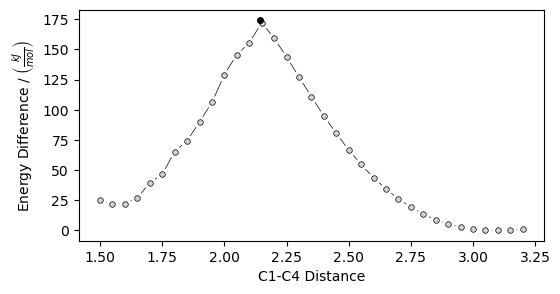

In [74]:
fig, ax =  plt.subplots(figsize=(6, 3))                     # Create a blank plot in a figure

x = df2["distance"]
y = df2["kJ/mole"]

x_ts = 2.142
y_ts = (energy_ts - np.min(df2["energy"])) * psi4.constants.hartree2kJmol

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "lightgray", edgecolor = "black", linewidth = 0.5, s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)

ax.scatter(x_ts, y_ts, color = "black", edgecolor = "black", s = 16, zorder = 2)

# ax.text(66.51-10, 20.5,"$66.5^\circ$")

ax.set_xlabel('C1-C4 Distance')
ax.set_ylabel(r'Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()

#print(df)

### Vibration Analysis

We can visualize the vibrations in the molecule. If the structure is a good transition state there should be only one imaginary vibration. Select the imaginary vibration and visualize it. Does it seem to describe the path from reactant tp product (and the reverse)? If so then we have more confidence that it represents a geomtry close to the true transition state.

Consider the code below. We use a terminal command to search for the frequency file. Then we manually copy and paste the filename into the ```helpers.show_normal_modes()``` function.

In [75]:
!ls -alr *.molden_normal_modes

-rw-r--r--  1 blink  staff  16932 22 May 22:26 butane_TS2.C4H6.16013.molden_normal_modes
-rw-r--r--  1 blink  staff  34528 15 May 15:57 butane_TS.default.29456.molden_normal_modes
-rw-r--r--  1 blink  staff  34528 14 May 22:34 butane_TS.default.1122.molden_normal_modes
-rw-r--r--  1 blink  staff  18963 22 May 22:01 butane_TS.C4H6.16013.molden_normal_modes
-rw-r--r--  1 blink  staff  16932 25 May 14:29 10_ring_closing_TS1.C4H6.20360.molden_normal_modes


In [76]:

hp.show_normal_modes(filename='10_ring_closing_TS1.C4H6.20360.molden_normal_modes')

interactive(children=(Dropdown(description='Normal mode:', options=((-646.7121890274, 0), (482.7544688671, 1),…

## IRC Analysis

We will now try to follow the intrinsic reaction coordinate. This would be the collection of structural chages that describes the path from the TS to the reactant or products. We start by following the imaginary vibration (the C1-C4 "bond stretch with a bit of a twist"), recalculate the new imaginary vibration and follow that. Repeat until the imaginary vibration cannot be found and we are near or at a ground state.

We choose to optimize for an IRC path by setting ```"OPT_TYPE":"irc"```. We must also chhose a step size. How much of a jump along the imaginary vibration do we want to take. Not too far or we might wander off the true path; not too small or this calculation will take a very long time. We will chhose ```"irc_step_size":0.25``` 

But which way will we go? Observe that the fibration goes back and forth. We can follow the IRC either "back" or "forth" by setting ```"IRC_DIRECTION":"forward"``` or ```"IRC_DIRECTION":"backward"```.

In [ ]:
ts.save_

In [109]:
#ts_irc = ts.clone()
ts_irc = mol3.clone()

irc_direction =  'forward' # 'backward'

psi4.core.clean_options()

psi4.set_memory("4GB")
psi4.set_output_file("10_forward_irc.log", append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
     "geom_maxiter":500,
     "full_hess_every":0,
     "opt_type":"irc",
     "irc_step_size":0.25,
     "ensure_bt_convergence":True,
     "irc_direction":irc_direction,
     })

E, history = psi4.optimize('b3pw91/6-31+G(d)',molecule=ts_irc, return_history=True)

#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = ts, return_history=True)          
#energy_ts, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("b3lyp/6-311++G(d,p)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("B3LYP-d3bj2b/6-311++G(d,p)", molecule = ts, return_history=True)   


ValueError: math domain error

In [ ]:
coordinates = history['coordinates']
energies = history['energy']


# Convert to kJ mol-1

# Convert to kJ mol-1
e = [energy * psi4.constants.hartree2kJmol for energy in energies]
# set highest value to 0
e = np.array(e)-np.max(e)

In [ ]:
import pickle
import json

### Save the 
pickle.dump((e, 
             mol2traj(backward, coordinates), 
             coord2traj_array(coordinates)), open( f"{irc_direction}.p", "wb" ) )

In [79]:
dir(ts_irc)

['B787',
 'BFS',
 'Z',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'activate_all_fragments',
 'add_atom',
 'atom_at_position',
 'basis_on_atom',
 'center_of_mass',
 'charge',
 'clone',
 'com_fixed',
 'comment',
 'connectivity',
 'create_psi4_string_from_molecule',
 'deactivate_all_fragments',
 'distance_matrix',
 'extract_subsets',
 'fZ',
 'fcharge',
 'find_highest_point_group',
 'find_point_group',
 'fix_com',
 'fix_orientation',
 'flabel',
 'fmass',
 'form_symmetry_information',
 'format_molecule_for_mol',
 'from_arrays',
 'from_dict',
 'from_schema',
 'from_string',
 'fsymbol',
 'ftrue_atomic_number',
 'full_geometry',
 'full_pg_n',
 'fx',
 'fy'

In [80]:
help(ts_irc.set_point_group)

Help on method set_point_group in module psi4.core:

set_point_group(...) method of psi4.core.Molecule instance
    set_point_group(self: psi4.core.Molecule, arg0: psi4.core.PointGroup) -> None
    
    Sets the molecular point group to the point group object arg0



In [104]:
ts_cart.get_full_point_group()

'C2'

In [97]:
ts_irc.set_point_group(psi4.core.PointGroup("C1"))

In [85]:
help(ts_irc.set_point_group)

Help on method set_point_group in module psi4.core:

set_point_group(...) method of psi4.core.Molecule instance
    set_point_group(self: psi4.core.Molecule, arg0: psi4.core.PointGroup) -> None
    
    Sets the molecular point group to the point group object arg0



In [101]:
print(ts.save_string_xyz())

0 1
 C    1.040286400752    0.255128500392   -0.647620403602
 C    0.689619973808    0.000000000000    0.707948226375
 C   -0.689619973808    0.000000000000    0.707948226375
 C   -1.040286400752   -0.255128500392   -0.647620403602
 H    1.923728325388   -0.184923247321   -1.124181813276
 H    0.710673984529    1.180092799768   -1.108799671342
 H    1.381740207157   -0.238709140492    1.514668434116
 H   -1.381740207157    0.238709140492    1.514668434116
 H   -1.923728325388    0.184923247321   -1.124181813276
 H   -0.710673984529   -1.180092799768   -1.108799671342



In [107]:
ts_irc = ts_cart.clone()
#ts_irc.set_point_group(psi4.core.PointGroup("C1"))

irc_direction =  'forward' # 'backward'

psi4.core.clean_options()

psi4.set_memory("4GB")
psi4.set_output_file("10_forward_irc.log", append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
     "geom_maxiter":500,
     "full_hess_every":0,
     "opt_type":"irc",
     "irc_step_size":0.25,
     "ensure_bt_convergence":True,
     "irc_direction":irc_direction,
     })

E, history = psi4.optimize('HF/cc-pVDZ',molecule=ts_irc, return_history=True)

#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = ts, return_history=True)          
#energy_ts, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("b3lyp/6-311++G(d,p)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("B3LYP-d3bj2b/6-311++G(d,p)", molecule = ts, return_history=True)   


ValueError: math domain error

In [105]:
data = """
        0 1
         C    1.040286400752    0.255128500392   -0.647620403602
         C    0.689619973808    0.000000000000    0.707948226375
         C   -0.689619973808    0.000000000000    0.707948226375
         C   -1.040286400752   -0.255128500392   -0.647620403602
         H    1.923728325388   -0.184923247321   -1.124181813276
         H    0.710673984529    1.180092799768   -1.108799671342
         H    1.381740207157   -0.238709140492    1.514668434116
         H   -1.381740207157    0.238709140492    1.514668434116
         H   -1.923728325388    0.184923247321   -1.124181813276
         H   -0.710673984529   -1.180092799768   -1.108799671342

       symmetry c1
       """ 

# Create the Molecule object
ts_cart = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(ts_cart)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.